<ipython-input-4-71ee72af7ffc>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['employment_duration_bucket', 'Current_loan_status']).size().unstack()


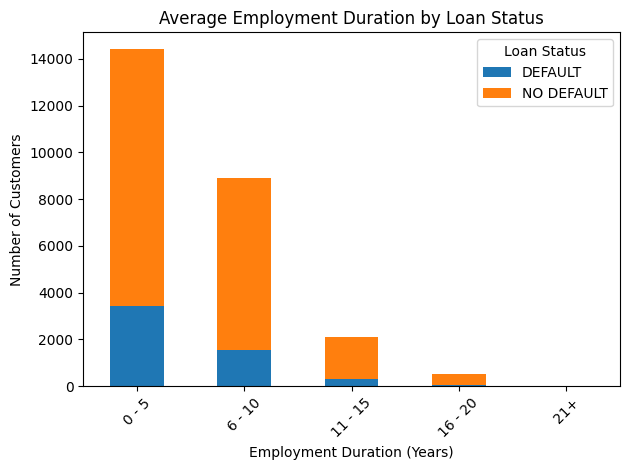

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/df_finalized (1).csv'
data = pd.read_csv(file_path)

# Ensure categories are treated as categorical type and set the order
employment_order = ['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21+']
data['employment_duration_bucket'] = pd.Categorical(data['employment_duration_bucket'], categories=employment_order, ordered=True)

# Group the data by employment duration bucket and current loan status
grouped_data = data.groupby(['employment_duration_bucket', 'Current_loan_status']).size().unstack()

# Plotting the bar chart with corrected category order
grouped_data.plot(kind='bar', stacked=True)
plt.title('Average Employment Duration by Loan Status')
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()

# Display the plot
plt.show()


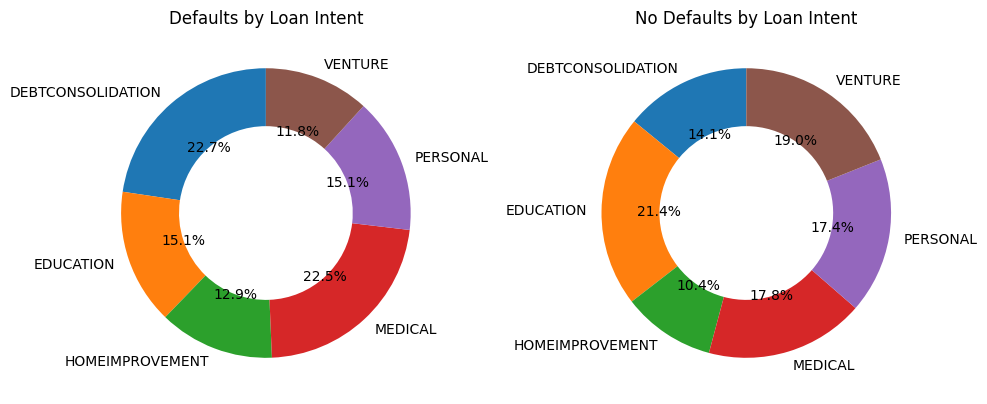

In [6]:
# Filtering and grouping the data for defaults and no defaults separately by loan intent
defaults = data[data['Current_loan_status'] == 'DEFAULT'].groupby('loan_intent').size()
no_defaults = data[data['Current_loan_status'] == 'NO DEFAULT'].groupby('loan_intent').size()

# Plotting the donut charts
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Defaults donut chart
ax[0].pie(defaults, labels=defaults.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
ax[0].set_title('Defaults by Loan Intent')

# No Defaults donut chart
ax[1].pie(no_defaults, labels=no_defaults.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
ax[1].set_title('No Defaults by Loan Intent')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

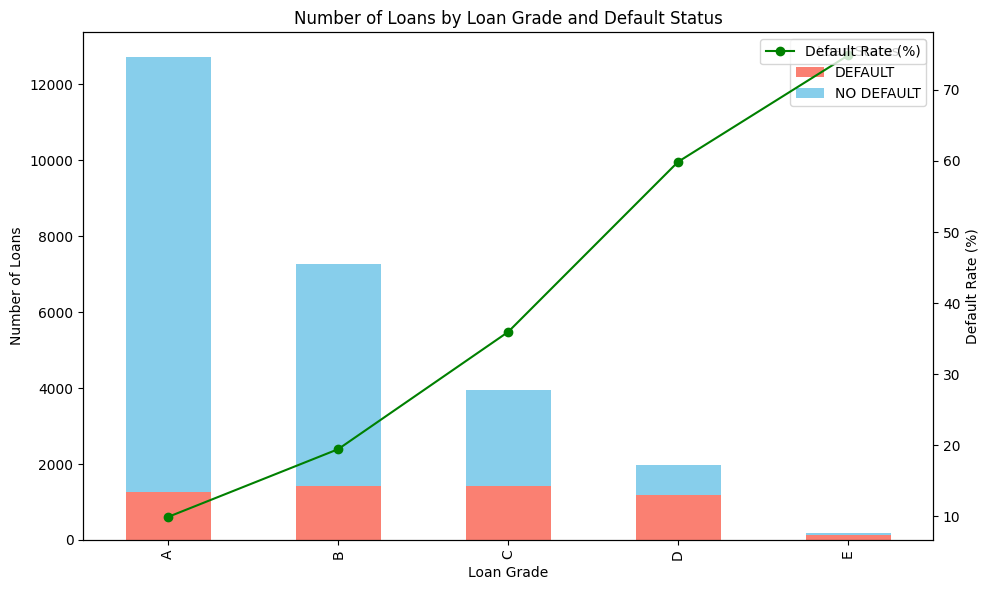

In [9]:
# Grouping the data by loan grade and current loan status (default vs no default)
loan_grade_grouped = data.groupby(['loan_grade', 'Current_loan_status']).size().unstack()

# Calculating default rates for each loan grade
loan_grade_grouped['Default Rate (%)'] = (loan_grade_grouped['DEFAULT'] /
                                          (loan_grade_grouped['DEFAULT'] + loan_grade_grouped['NO DEFAULT'])) * 100

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the number of loans by loan grade (stacked bar chart for default and no default)
loan_grade_grouped[['DEFAULT', 'NO DEFAULT']].plot(kind='bar', stacked=True, ax=ax1, color=['salmon', 'skyblue'])

# Adding labels and title for the bar chart
ax1.set_xlabel('Loan Grade')
ax1.set_ylabel('Number of Loans')
ax1.set_title('Number of Loans by Loan Grade and Default Status')
ax1.legend(title='Loan Status')

# Plotting the default rate as a line chart on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(loan_grade_grouped.index, loan_grade_grouped['Default Rate (%)'], color='green', marker='o', linestyle='-', label='Default Rate (%)')
ax2.set_ylabel('Default Rate (%)')
ax2.legend(loc='upper right')

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()